# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [3]:
#cities

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_name = "city"

city_url = url + "&appid=" + weather_api_key + "&q=" + city_name + "&units=" + units

In [7]:
requests.get(city_url).json()
# response =requests.get(city_url).json()
# response

{'coord': {'lon': 149.1292, 'lat': -35.2813},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 37.09,
  'feels_like': 37.09,
  'temp_min': 33.78,
  'temp_max': 41.11,
  'pressure': 1033,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 2.3, 'deg': 160},
 'clouds': {'all': 0},
 'dt': 1714595575,
 'sys': {'type': 2,
  'id': 2004200,
  'country': 'AU',
  'sunrise': 1714596060,
  'sunset': 1714634387},
 'timezone': 36000,
 'id': 2172517,
 'name': 'City',
 'cod': 200}

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city_name + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() #cit_weather = response in class examples
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})      

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gangtok
Processing Record 2 of Set 1 | sultanah
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | sinabang
Processing Record 6 of Set 1 | fukuecho
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | byron
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | heihe
Processing Record 11 of Set 1 | 'ohonua
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | waliso
Processing Record 15 of Set 1 | cajati
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | papao
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | howrah
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | la'ie
Processing Record 23 of Set 1 | la c

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gangtok,-35.2813,149.1292,41.11,94,0,2.3,AU,1714595575
1,sultanah,-35.2813,149.1292,41.11,94,0,2.3,AU,1714595575
2,adamstown,-35.2813,149.1292,41.11,94,0,2.3,AU,1714595575
3,olonkinbyen,-35.2813,149.1292,41.11,94,0,2.3,AU,1714595575
4,sinabang,-35.2813,149.1292,41.11,94,0,2.3,AU,1714595575


In [13]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

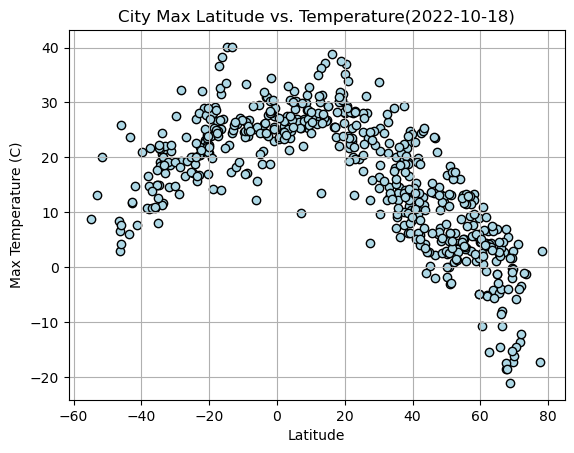

In [25]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
x_axis = latitude
y_axis = temperature
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

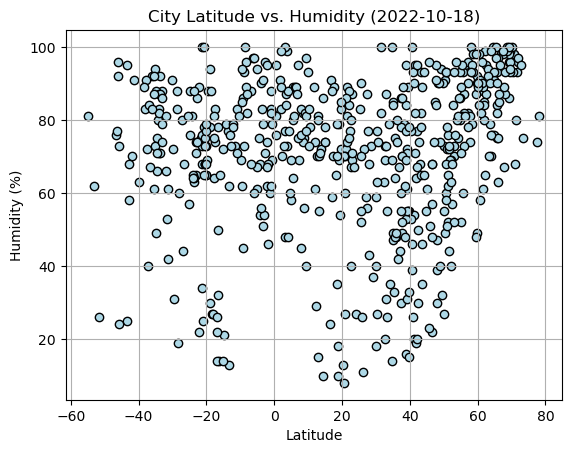

In [30]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
x_axis = latitude
y_axis = humidity
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

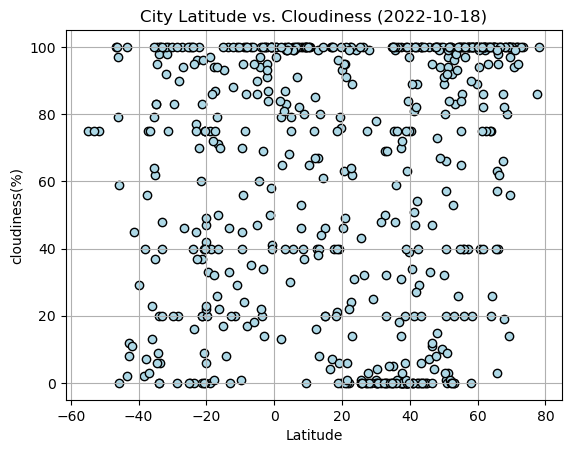

In [33]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
x_axis = latitude
y_axis = cloudiness
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

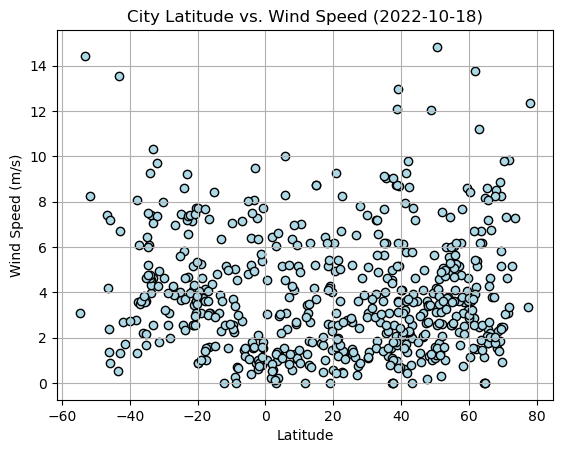

In [36]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
x_axis = latitude
y_axis = wind_speed
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [379]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_axis, y_axis, title):
    x_values = pd.DataFrame(city_data_df["Lat"])
    y_values = pd.DataFrame(city_data_df["Max Temp"])
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regression_values = x_axis *slope + intercept  #mx + b =y (slop=m, b=intercept, x=value)

    linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")
    plt.plot(x_axis, y_axis, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.show()

In [380]:
# from scipy.stats import linregress
 
# def linear_regression_plots(x_values, y_values, title):
#     slope, intercept = linregress(x_values, y_values)
#     regression_line = slope * x_values + intercept
#     # Plotting
#     plt.scatter(x_values, y_values, label='Data')
#     plt.plot(x_values, regression_line, color='red', label='Regression Line')
#     plt.title(title)
#     plt.xlabel('X Axis')
#     plt.ylabel('Y Axis')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
#     print(f"Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
#     print(f"R-squared: {r_value**2:.2f}")
# # x_values = pd.DataFrame(city_data_df["Lat"])
# # y_values = pd.DataFrame(city_data_df["Max Temp"])

In [381]:
linear_regression_plots(x_values, y_values, "Max Temperature")

ValueError: too many values to unpack (expected 4)

y_values

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [382]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE

SyntaxError: invalid syntax (283533795.py, line 1)

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

In [ ]:
**Discussion about the linear relationship:** YOUR RESPONSE HERE